# Exomiser Cli Comparison

Exomiser genes prioritisation is compared in this notebook using two different configurations. The first configuration used the example template test-analysis-exome.yml, where these HPO terms were set:

- HP:0001156	Brachydactyly
- HP:0001363	Craniosynostosis
- HP:0010055	Broad hallux
- HP:0011304	Broad thumb

The second configuration used the same *test-analysis-exome.yml*, but I randomly selected another five HPO terms:

- HP:0007068	Inferior vermis hypoplasia
- HP:0030270	Elevated red cell adenosine deaminase level
- HP:0030832	Vitreous strands
- HP:0033002	Bronchial papilloma

Starting with the original configuration, I saved "original.json", followed by a modified version "modified.json" using random HPO terms.
This comparison will be based on JSON Object Keys since the values between both of the results must be obviously very different.


In [40]:
import json
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from tabulate import tabulate
import pandas as pd
original_file = './original.json'
modified_file = './modified.json'

with open(original_file, 'r') as o:
  original = json.load(o)

with open(modified_file, 'r') as m:
  modified = json.load(m)

In [41]:
def keys(d, c = []):
  return [i for a, b in d.items() for i in ([c+[a]] if not isinstance(b, dict) else keys(b, c+[a]))]

def flatten(l):
    return [item for sublist in l for item in sublist]

#### First, I want to compare the key elements length of the two JSON arrays.

In [42]:
print(f'The original set has {len(original)} elements')
print(f'The modified set has {len(modified)} elements')

The original set has 226 elements
The modified set has 226 elements


In [43]:
ks_original = list(map(lambda x:  list(map('.'.join, keys(x))), original))
ks_modified = list(map(lambda x:  list(map('.'.join, keys(x))), modified))

#### In this step, I wanted to compare the length of first key elements of both Json Arrays.

In [44]:
print(f'The original first element set has {len(ks_original[0])} elements')
print(f'The modified first element set has {len(ks_modified[0])} elements')


The original first element set has 38 elements
The modified first element set has 34 elements


In original not in modified: 
associatedDiseases
priorityResults.HIPHIVE_PRIORITY.mouseScore
priorityResults.HIPHIVE_PRIORITY.diseaseMatches
priorityResults.HIPHIVE_PRIORITY.humanScore
priorityResults.OMIM_PRIORITY.associatedDiseases
-----
In modified not in original: 
priorityResults.HIPHIVE_PRIORITY.fishScore


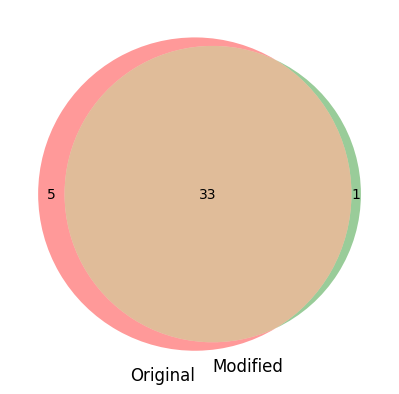

In [45]:
set_original = set(ks_original[0])
set_modified = set(ks_modified[0])

v1 = venn2(
    [set_original, set_modified],
    set_labels=['Original', 'Modified'],
)

joined='\n'.join(set_original - set_modified)
joined2='\n'.join(set_modified - set_original)
print(f'In original not in modified: \n{joined}')

print('-----')

print(f'In modified not in original: \n{joined2}')

#### Comparing second json key elements of both arrays

In original not in modified: 
associatedDiseases
priorityResults.HIPHIVE_PRIORITY.diseaseMatches
priorityResults.HIPHIVE_PRIORITY.humanScore
priorityResults.HIPHIVE_PRIORITY.fishScore
priorityResults.OMIM_PRIORITY.associatedDiseases


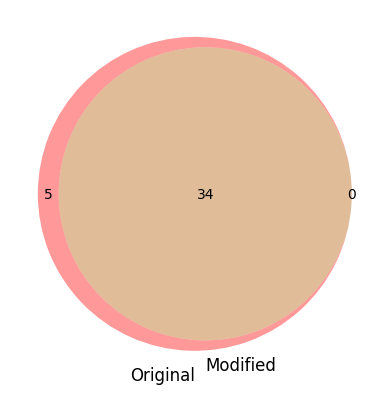

In [46]:
set_original = set(ks_original[1])
set_modified = set(ks_modified[1])

v1 = venn2(
    [set_original, set_modified],
    set_labels=['Original', 'Modified'],
)
joined='\n'.join(set_original - set_modified)
print(f'In original not in modified: \n{joined}')


#### Comparing third key elements of JSON arrays

In modified not in original: 
associatedDiseases
priorityResults.OMIM_PRIORITY.associatedDiseases


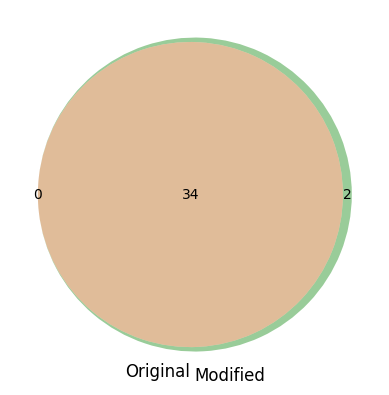

In [47]:
set_original = set(ks_original[2])
set_modified = set(ks_modified[2])

v1 = venn2(
    [set_original, set_modified],
    set_labels=['Original', 'Modified'],
)
joined='\n'.join(set_modified - set_original)
print(f'In modified not in original: \n{joined}')

#### Comparing all unique key values of both arrays

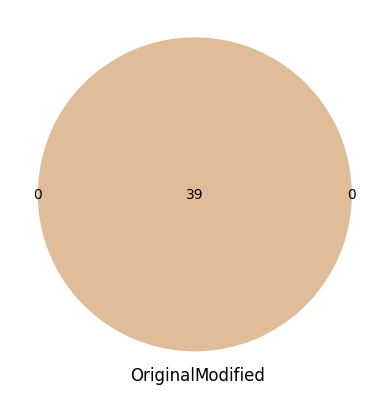

In [48]:
ks_original_fl = set(flatten(ks_original))
ks_modified_fl = set(flatten(ks_modified))

v1 = venn2(
    [ks_original_fl, ks_modified_fl],
    set_labels=['Original', 'Modified'],
)


#### Counting total and average number of keys in all json elements

In [49]:
print(f'Absolute length original keys {len(flatten(ks_original))}')
print(f'Absolute length modified keys {len(flatten(ks_modified))}')
print(f'Mean length original keys {len(flatten(ks_original))/len(ks_original)}')
print(f'Mean length modified keys {len(flatten(ks_modified))/len(ks_modified)}')


Absolute length original keys 7311
Absolute length modified keys 7491
Mean length original keys 32.349557522123895
Mean length modified keys 33.14601769911504


In [50]:
comb=set(flatten(ks_original) + flatten(ks_modified))

#### Number of unique keys of original dataset

In [51]:
d = dict((x, flatten(ks_original).count(x)) for x in set(comb))
df = pd.DataFrame.from_dict([d]).T
print(tabulate(df, headers=['key', 'count'], tablefmt='plsql'))

key                                                               count
--------------------------------------------------------------  -------
priorityResults.OMIM_PRIORITY.scoresByMode.AUTOSOMAL_DOMINANT       226
priorityResults.HIPHIVE_PRIORITY.phenotypeEvidence                   77
priorityResults.OMIM_PRIORITY.scoresByMode.X_DOMINANT               226
variantScore                                                        219
priorityResults.HIPHIVE_PRIORITY.ppiEvidence                        157
priorityResults.OMIM_PRIORITY.score                                 226
compatibleInheritanceModes                                          226
variantEvaluations                                                  226
geneScores                                                          226
priorityResults.OMIM_PRIORITY.associatedDiseases                     73
priorityResults.OMIM_PRIORITY.scoresByMode.X_RECESSIVE              226
geneIdentifier.ucscId                                           

#### Number of unique keys of modified dataset

In [52]:
d = dict((x, flatten(ks_modified).count(x)) for x in set(comb))
df = pd.DataFrame.from_dict([d]).T
print(tabulate(df, headers=['key', 'count'], tablefmt='plsql'))

key                                                               count
--------------------------------------------------------------  -------
priorityResults.OMIM_PRIORITY.scoresByMode.AUTOSOMAL_DOMINANT       226
priorityResults.HIPHIVE_PRIORITY.phenotypeEvidence                  125
priorityResults.OMIM_PRIORITY.scoresByMode.X_DOMINANT               226
variantScore                                                        214
priorityResults.HIPHIVE_PRIORITY.ppiEvidence                        157
priorityResults.OMIM_PRIORITY.score                                 226
compatibleInheritanceModes                                          226
variantEvaluations                                                  226
geneScores                                                          226
priorityResults.OMIM_PRIORITY.associatedDiseases                     73
priorityResults.OMIM_PRIORITY.scoresByMode.X_RECESSIVE              226
geneIdentifier.ucscId                                           